# Pymaceuticals Inc.
---

### Analysis

- The analysis shows that when the weight of the mice increases, the mean tumor volume also increases as the correlation between the weight of the mice and the mean tumor volume is 0.84
  
- The regression analysis clearly shows how much the mean tumor volume (dependent variable) changes when the weight of the mice (independent variable) changes. with an R-squared value of 0.70, we can predict the data well with the model. higher R-squared values indicate a smaller difference between the observed data and the fitted values. This model explains all the variation in the response variable around its mean value.

- In conclusion, among all the treatment options, Capomulin shrinks tumors better.
 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
new_data = pd.merge(study_results,mouse_metadata, on= 'Mouse ID', how = 'outer')

# Display the data table for preview
new_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [71]:
# Checking the number of mice.
new_data['Mouse ID'].nunique()

249

In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ID = new_data.loc[new_data.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mouse_ID


array(['g989'], dtype=object)

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = new_data.loc[new_data["Mouse ID"] == 'g989', :]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = new_data[new_data['Mouse ID'].isin(dup_mouse_ID)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [75]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()                                                
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
SEM = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()


summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":SEM})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_new =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_new



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()

In [79]:
regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

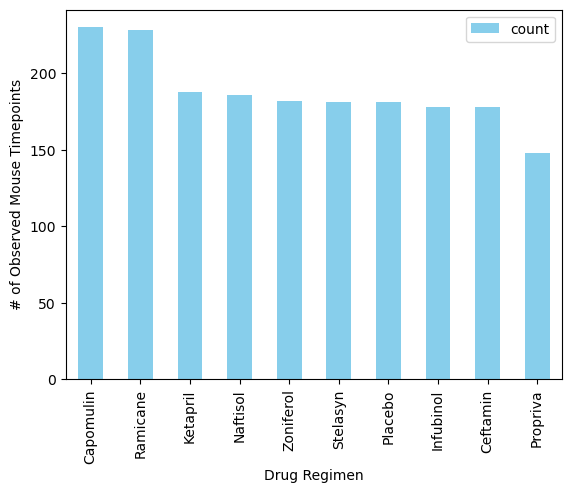

In [80]:
regimen_counts.plot(kind='bar',color='skyblue', alpha=1)


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.legend()
plt.show()


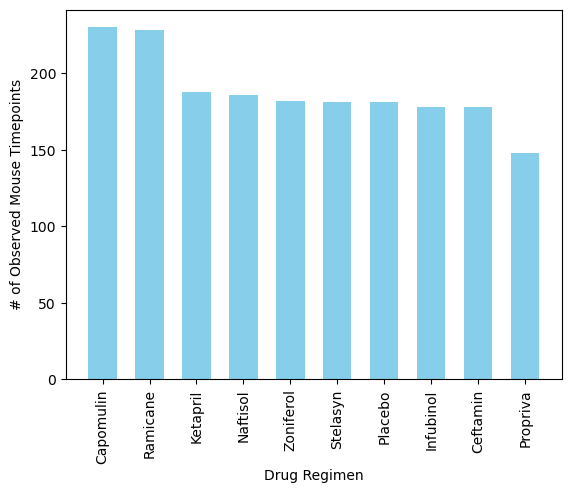

In [81]:
x_axis = regimen_counts.index
y_axis = regimen_counts.values

plt.bar(x_axis, y_axis, color='skyblue', alpha = 1, align = 'center', width = 0.6)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation="vertical")

plt.show()

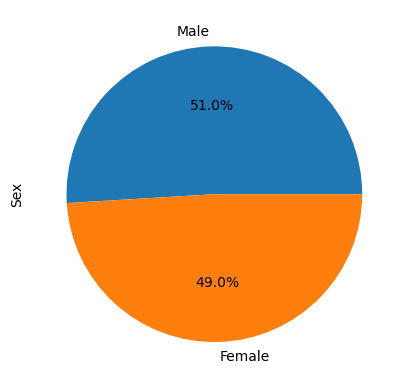

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data["Sex"].value_counts()

gender_counts.plot.pie(autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


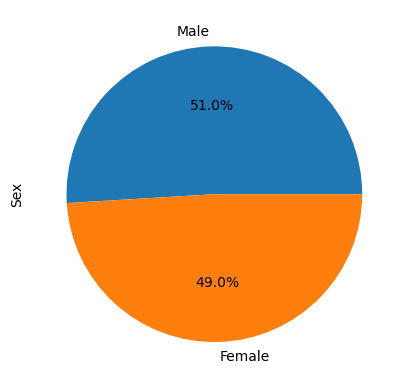

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y = 'Total Count', autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_final = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin', :]
Ramicane_final = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane', :]
Infubinol_final = clean_data.loc[clean_data['Drug Regimen'] == 'Infubinol', :]
Ceftamin_final = clean_data.loc[clean_data['Drug Regimen'] == 'Ceftamin', :]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_final.groupby('Mouse ID').max()['Timepoint']

Capomulin_vol = pd.DataFrame(Capomulin_last)

Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=('Mouse ID', 'Timepoint'), how = 'left')


# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    treatment_df = clean_data.loc[clean_data['Drug Regimen'] == treatment, :]
    
   
    last_timepoint = treatment_df.groupby('Mouse ID').max()['Timepoint']

    last_timepoint_df = pd.DataFrame(last_timepoint)
    

    merged_df = pd.merge(last_timepoint_df, clean_data, on=('Mouse ID', 'Timepoint'), how='left')
    
    tumor_vol_data.append(merged_df['Tumor Volume (mm3)'])

# Calculate and print the quartiles, IQR, and potential outliers
    quartiles = merged_df['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = merged_df.loc[(merged_df['Tumor Volume (mm3)'] < lower_bound) | 
                             (merged_df['Tumor Volume (mm3)'] > upper_bound), 'Tumor Volume (mm3)']
    


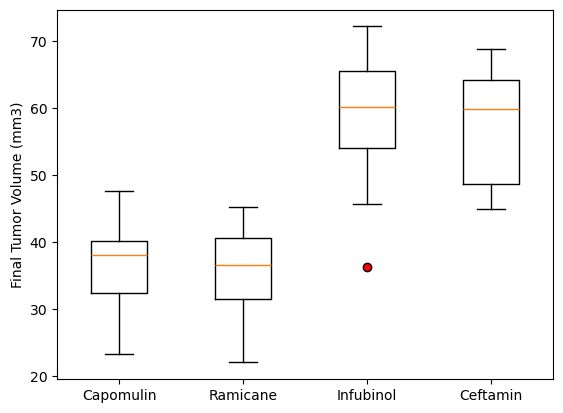

In [85]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

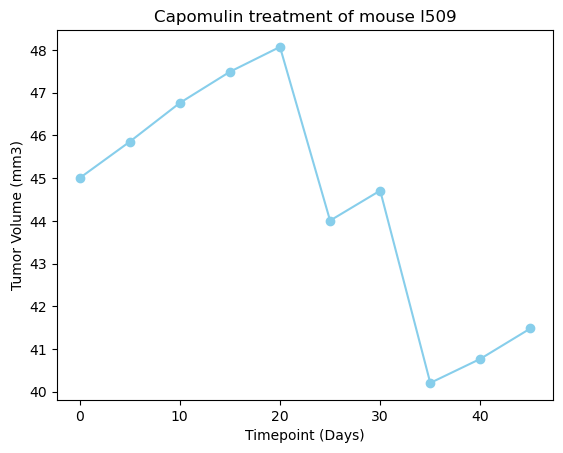

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_data = clean_data[(clean_data['Mouse ID'] == 'l509')]

plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()




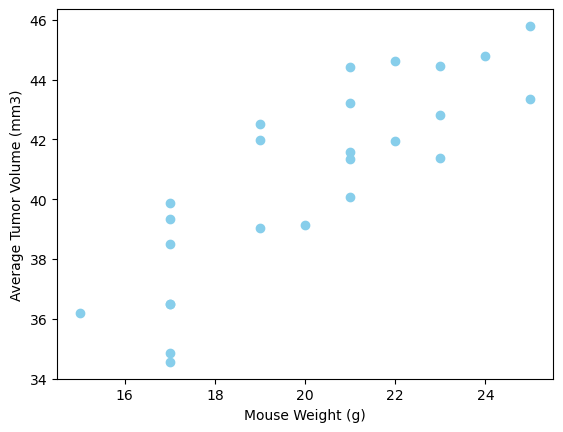

In [95]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group data by Mouse ID to get the average tumor volume for each mouse during Capomulin regimen
capomulin_tumor_volume = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get corresponding mouse weight for each mouse ID
capomulin_mouse_weights = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(capomulin_mouse_weights, capomulin_tumor_volume, marker='o', color='skyblue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_mouse_weights, capomulin_avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


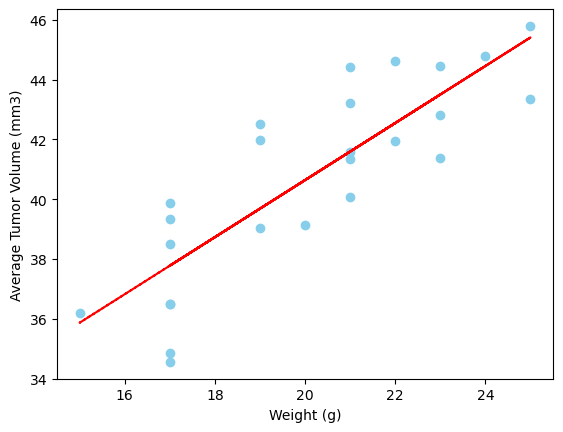

In [97]:
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weights, capomulin_tumor_volume)

# Create a line equation for the linear regression model
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create a scatter plot
plt.scatter(capomulin_mouse_weights, capomulin_tumor_volume, marker='o', color='skyblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the linear regression line
plt.plot(capomulin_mouse_weights, slope * capomulin_mouse_weights + intercept, color='red', linestyle='--', label=line_eq)

plt.show()